In [1]:
pip uninstall pulp

In [2]:
pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 91.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
from pulp import *

In [4]:
#Create a variable to hold the problem data
problem = LpProblem("Cost_Min", LpMinimize)

In [5]:
# Define the supply and demand values
# There are 3 Factories: 1 in Bregenz, 1 in Zürich and 1 in Munich, Each Factory has different supply cacpacity.
supply = {
    "Bregenz": 100,
    "Zürich": 150,
    "Munich": 200
}

# There are 5 Retailers, Each Retailer has different demand.
demand = {
    "Konstanz": 80,
    "Friedrichshafen": 50,
    "Buchs": 70,
    "Lindau": 60,
    "Lochau": 120
}

In [6]:
# Create a list of sources and destinations
sources = list(supply.keys())
destinations = list(demand.keys())

In [7]:
# Define the transportation cost matrix using nested lists
costs = [
    [1000, 900, 900, 300, 300],  # Transportation Costs from Bregenz to: Konstanz, Friedrichshafen, Buchs, Lindau, Lochau
    [900, 1100, 400, 900, 1000], # Transportation Costs from Zürich to: Konstanz, Friedrichshafen, Buchs, Lindau, Lochau
    [500, 500, 900, 500, 700]   # Transportation Costs from Munich to: Konstanz, Friedrichshafen, Buchs, Lindau, Lochau
]

# Create the cost dictionary using the given costs matrix
cost = {
    (sources[i], destinations[j]): costs[i][j]
    for i in range(len(sources))
    for j in range(len(destinations))
}

In [8]:
# Create binary decision variables for each source-destination pair
X = LpVariable.dicts("X", (sources, destinations), lowBound=0, cat=LpInteger)

In [9]:
# Define the objective function
problem += pulp.lpSum(X[source][dest] * cost[source, dest] for source in sources for dest in destinations), "Total Cost"

In [10]:
#Add supply constraints
for source in sources:
    problem += pulp.lpSum(X[source][dest] for dest in destinations) <= supply[source], f"Supply{source}"

In [11]:
#Add demand constraints
for dest in destinations:
    problem += pulp.lpSum(X[source][dest] for source in sources) == demand[dest], f"Demand{dest}"

In [12]:
#Solve the problem
problem.solve()

1

In [13]:
# Optimized allocation: total transportation cost is EUR 170 000
# Cost-effective and balanced distribution: satisfies both the supply capacity of each factory and the demand of each retailer
for source in sources:
    for dest in destinations:
        if X[source][dest].varValue > 0:
            print(f"Ship {X[source][dest].varValue} units from {source} to {dest}")

print(f"Total Cost: EUR {pulp.value(problem.objective)}")

Ship 100.0 units from Bregenz to Lochau
Ship 70.0 units from Zürich to Buchs
Ship 10.0 units from Zürich to Lochau
Ship 80.0 units from Munich to Konstanz
Ship 50.0 units from Munich to Friedrichshafen
Ship 60.0 units from Munich to Lindau
Ship 10.0 units from Munich to Lochau
Total Cost: EUR 170000.0


In [15]:
pip install pySankey

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pySankey.sankey import sankey

In [17]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000

In [18]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

In [29]:
colors = {
    "Bregenz": "#000000",
    "Lochau": "#383838",
    "Zürich": "#e67e7e",
    "Buchs": "#964545",
    "Munich": "#e6ed09",
    "Konstanz": "#f9ff47",
    "Friedrichshafen": "#f0f571",
    "Lindau": "#f3f5cb"
}

In [30]:
# Production Quantity
df_prod = pd.read_csv('sankey.csv', index_col = 0, sep = ',')
print('{:,} lines'.format(len(df_prod)))

7 lines


In [31]:
# Keeping only positive values
df_plot = df_prod[df_prod['value']>0].reset_index()
df_plot.head()

,source,target,value
0,Bregenz,Lochau,100
1,Zürich,Buchs,70
2,Zürich,Lochau,10
3,Munich,Konstanz,80
4,Munich,Friedrichshafen,50


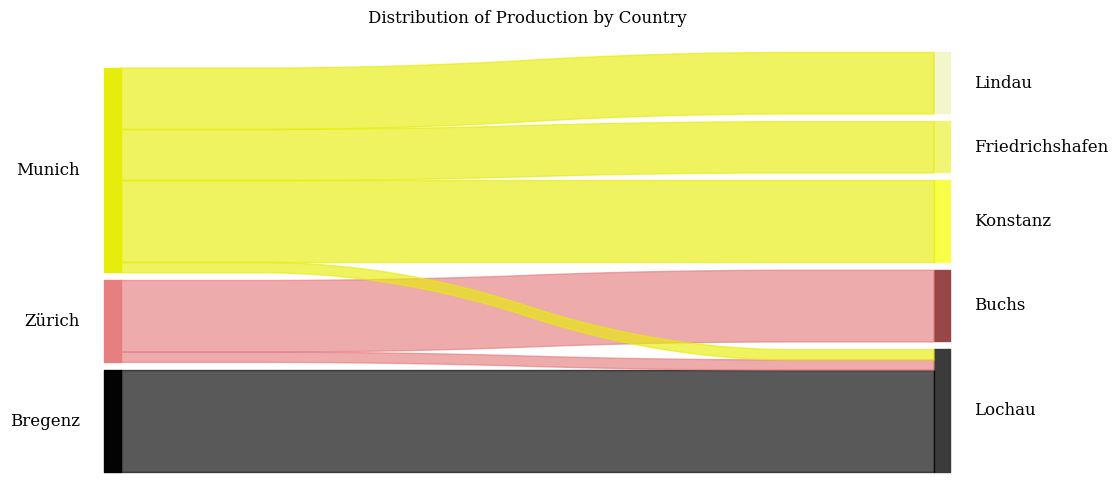

In [32]:
# Plot
sankey(
    left = df_plot["source"], right = df_plot["target"],
    leftWeight= df_plot["value"], rightWeight = df_plot["value"], fontsize=12, colorDict=colors
)
plt.gcf().set_size_inches((12,6))
plt.title('Distribution of Production by Country')
plt.show()

In [ ]:
# https://coin-or.github.io/pulp/